In [1]:
import time
inicio = time.time()

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import LeaveOneOut

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# Se importan los datos

In [3]:
df = pd.read_excel("..//Base_datos_Clasificacion binaria.xlsx", index_col = 0)

In [4]:
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,MP,Empresa sancionada,UTE
0,0,1738093.21,1484428.72,6,1,0
1,0,469670.24,272492.00,4,0,0
2,0,1025088.19,707310.85,1,0,0
3,0,999890.00,497621.36,6,0,0
4,0,72598.27,47508.92,1,1,0
...,...,...,...,...,...,...
2211,1,5542028.88,5514320.00,6,1,0
2212,1,6095782.00,5100555.00,6,1,0
2213,1,3752906.00,3744400.00,6,1,0
2214,1,23896564.00,19547338.00,6,0,1


# Se trata el desbalanceo de clases mediante una tecnica de Sobre - Muestreo. Hay que instalar la libreria imbalanced - learn

In [5]:
y = df["Licitacion reparto"]
X = df[df.columns[1:]]

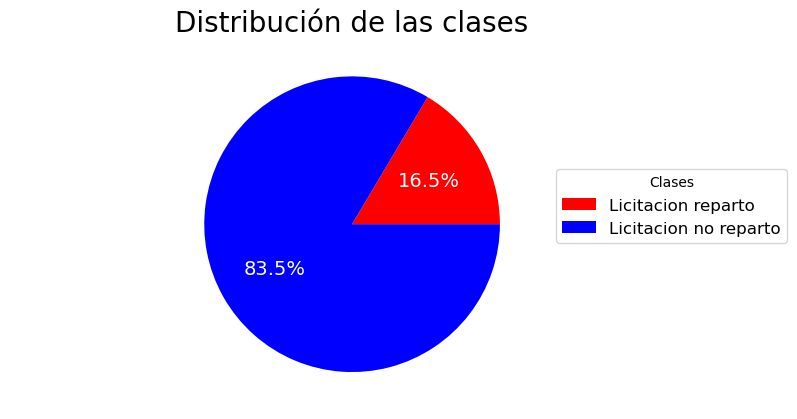

In [6]:
datos = [len(y[y == 1]), len(y[y == 0])]
etiquetas = ['Licitacion reparto', 'Licitacion no reparto']
colores = ['red', 'blue']

plt.pie(datos, labels = etiquetas, colors = colores, autopct = '%1.1f%%', textprops = {'fontsize': 14, 'color': 'white'})
plt.title('Distribución de las clases', fontsize = 20)
plt.legend(title = "Clases", bbox_to_anchor=(1.7, 0.55), loc='right', fontsize = 12)
plt.show()

### Se utiliza la técnica "RandomOverSampler" que es la generación de nuevos datos de la clase minoritaria mediante muestreo simple con reemplazamiento y de forma aleatoria.

In [7]:
# conda install -c conda-forge imbalanced-learn
ros = RandomOverSampler(random_state = 123)
X_res, y_res = ros.fit_resample(X, y)
df = pd.concat([y_res, X_res], axis = 1)
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,MP,Empresa sancionada,UTE
0,0,1738093.21,1484428.72,6,1,0
1,0,469670.24,272492.00,4,0,0
2,0,1025088.19,707310.85,1,0,0
3,0,999890.00,497621.36,6,0,0
4,0,72598.27,47508.92,1,1,0
...,...,...,...,...,...,...
3697,1,25652311.00,23974592.00,6,0,0
3698,1,312588.00,342566.00,1,0,0
3699,1,140176.00,139475.00,1,0,0
3700,1,1573000.00,1339724.00,1,1,0


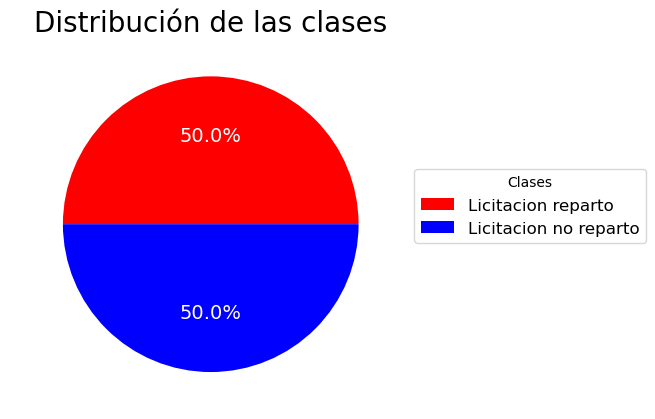

In [8]:
datos = [len(y_res[y_res == 1]), len(y_res[y_res == 0])]
etiquetas = ['Licitacion reparto', 'Licitacion no reparto']
colores = ['red', 'blue']

plt.pie(datos, labels = etiquetas, colors = colores, autopct = '%1.1f%%', textprops = {'fontsize': 14, 'color': 'white'})
plt.title('Distribución de las clases', fontsize = 20)
plt.legend(title = "Clases", bbox_to_anchor=(1.7, 0.55), loc='right', fontsize = 12)
plt.show()

# Se estandarizan y normalizan los predictores numericos

In [9]:
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]

In [10]:
scaler = StandardScaler()
stand = scaler.fit_transform(predictores_numericos)

In [11]:
df[["Importe presupuestado", "Importe adjudicado"]] = stand
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]
predictores_numericos

,Importe presupuestado,Importe adjudicado
0,-0.243817,-0.245165
1,-0.268501,-0.270829
2,-0.257692,-0.261621
3,-0.258182,-0.266062
4,-0.276228,-0.275593
...,...,...
3697,0.221564,0.231083
3698,-0.271557,-0.269345
3699,-0.274913,-0.273646
3700,-0.247029,-0.248230


In [12]:
norm = (predictores_numericos - predictores_numericos.min()) / (predictores_numericos.max() - predictores_numericos.min())

In [13]:
df[["Importe presupuestado", "Importe adjudicado"]] = norm
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]
predictores_numericos

,Importe presupuestado,Importe adjudicado
0,0.002679,0.002861
1,0.000699,0.000494
2,0.001566,0.001343
3,0.001526,0.000934
4,0.000079,0.000054
...,...,...
3697,0.039999,0.046796
3698,0.000454,0.000631
3699,0.000185,0.000234
3700,0.002421,0.002579


In [14]:
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,MP,Empresa sancionada,UTE
0,0,0.002679,0.002861,6,1,0
1,0,0.000699,0.000494,4,0,0
2,0,0.001566,0.001343,1,0,0
3,0,0.001526,0.000934,6,0,0
4,0,0.000079,0.000054,1,1,0
...,...,...,...,...,...,...
3697,1,0.039999,0.046796,6,0,0
3698,1,0.000454,0.000631,1,0,0
3699,1,0.000185,0.000234,1,0,0
3700,1,0.002421,0.002579,1,1,0


# Codificacion OneHotEncoder

In [15]:
codificador = OneHotEncoder()

In [16]:
df[["MP", "Empresa sancionada", "UTE"]] = df[["MP", "Empresa sancionada", "UTE"]].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702 entries, 0 to 3701
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Licitacion reparto     3702 non-null   int64   
 1   Importe presupuestado  3702 non-null   float64 
 2   Importe adjudicado     3702 non-null   float64 
 3   MP                     3702 non-null   category
 4   Empresa sancionada     3702 non-null   category
 5   UTE                    3702 non-null   category
dtypes: category(3), float64(2), int64(1)
memory usage: 98.1 KB


In [17]:
codificacion = codificador.fit_transform(df[["MP"]])

mercados = pd.DataFrame(codificacion.toarray(),
                        columns = ["MP1", "MP4", "MP6"])
df = pd.concat([df, mercados], axis = 1)
df.drop("MP", axis = 1, inplace = True)
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,Empresa sancionada,UTE,MP1,MP4,MP6
0,0,0.002679,0.002861,1,0,0.0,0.0,1.0
1,0,0.000699,0.000494,0,0,0.0,1.0,0.0
2,0,0.001566,0.001343,0,0,1.0,0.0,0.0
3,0,0.001526,0.000934,0,0,0.0,0.0,1.0
4,0,0.000079,0.000054,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3697,1,0.039999,0.046796,0,0,0.0,0.0,1.0
3698,1,0.000454,0.000631,0,0,1.0,0.0,0.0
3699,1,0.000185,0.000234,0,0,1.0,0.0,0.0
3700,1,0.002421,0.002579,1,0,1.0,0.0,0.0


In [18]:
nombre_clases = ["Licitacion no reparto", "Licitacion reparto"]
nombre_predicciones = list(map(lambda x : x + " predicho", nombre_clases))

# Se hace la estimacion por Random Forest

In [19]:
X = df[df.columns[1:]]
y = df["Licitacion reparto"]

loo = LeaveOneOut()
rfc = RandomForestClassifier(random_state = 123) 
# random_state sirve para controlar la aleatoriedad del clasificador en los resultados
predicciones = []
prob_predicciones = []

for train_index, test_index in loo.split(X) :
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    y_pred_prob = rfc.predict_proba(X_test)
    predicciones.append(int(y_pred))
    prob_predicciones.append(y_pred_prob[0][1])

In [20]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

# CURVA ROC. El punto optimo es = (fpr = 0, tpr = 1)

In [21]:
auc_score = roc_auc_score(y, prob_predicciones)
auc_score

0.9932590061120175

In [22]:
fpr, tpr, thresholds = roc_curve(y, prob_predicciones)
#fpr es 1 - especificidad = 1 - (TN / (FP + TN)) = FP / (FP + TN)
#tpr es la sensibilidad = TP / (TP + FN)

In [23]:
distances = np.linalg.norm(np.column_stack((fpr, tpr)) - np.array([0, 1]), axis=1)
optimal_threshold_index = np.argmin(distances)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_threshold

0.87

In [24]:
optimal_fpr = fpr[optimal_threshold_index]
optimal_fpr

0.030253916801728797

In [25]:
optimal_tpr = tpr[optimal_threshold_index]
optimal_tpr

0.9724473257698542

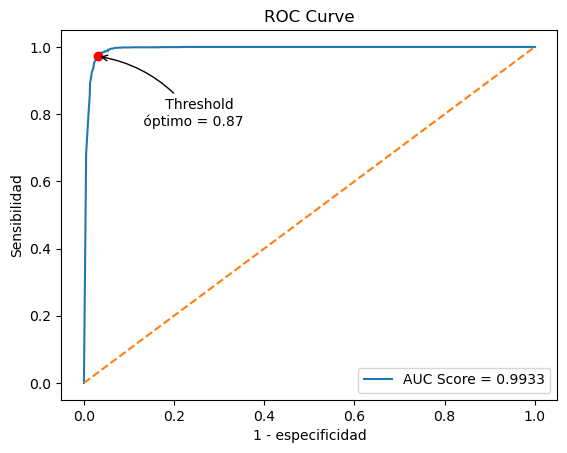

In [26]:
plt.plot(fpr, tpr, label = f'AUC Score = {auc_score:.4}')
plt.plot([0,1], linestyle="--")
plt.plot(optimal_fpr, optimal_tpr, 'ro')
plt.annotate(f'      Threshold\n óptimo = {optimal_threshold:.2}',
             xy=(optimal_fpr, optimal_tpr), xycoords='data',
             xytext=(+30, -50), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle = "arc3, rad = .2"))
plt.ylabel('Sensibilidad')
plt.xlabel('1 - especificidad')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

# Metricas de la Matriz de Confusion

In [27]:
predicciones = pd.Series(predicciones, name = "Prediccion licitacion reparto")
prob_predicciones = pd.Series(prob_predicciones, name = "Prob prediccion")
cp = pd.concat([y, predicciones, prob_predicciones], axis = 1)
cp
# Este dataframe no contiene las predicciones calculadas en el punto optimo de la curva ROC.
# Contiene las predicciones calculadas segun el punto por defecto para determinar las predicciones del clasificador.

,Licitacion reparto,Prediccion licitacion reparto,Prob prediccion
0,0,0,0.06
1,0,0,0.08
2,0,0,0.01
3,0,0,0.00
4,0,1,0.80
...,...,...,...
3697,1,1,1.00
3698,1,1,1.00
3699,1,1,0.97
3700,1,1,1.00


In [28]:
cp["Prediccion licitacion reparto en el punto optimo"] = 0
prediccion_final = cp["Prediccion licitacion reparto en el punto optimo"]
prediccion_final = cp.apply(lambda x: 1 if x["Prob prediccion"] >= optimal_threshold else 0, axis=1)
prediccion_final

0       0
1       0
2       0
3       0
4       0
       ..
3697    1
3698    1
3699    1
3700    1
3701    0
Length: 3702, dtype: int64

In [29]:
cp["Prediccion licitacion reparto en el punto optimo"] = prediccion_final
pd.concat([cp, prediccion_final], axis = 1)
cp.drop(columns = "Prediccion licitacion reparto", axis = 1, inplace = True)
cp

,Licitacion reparto,Prob prediccion,Prediccion licitacion reparto en el punto optimo
0,0,0.06,0
1,0,0.08,0
2,0,0.01,0
3,0,0.00,0
4,0,0.80,0
...,...,...,...
3697,1,1.00,1
3698,1,1.00,1
3699,1,0.97,1
3700,1,1.00,1


In [30]:
cm = confusion_matrix(y, cp["Prediccion licitacion reparto en el punto optimo"]) # matriz de confusion
cm = pd.DataFrame(cm, columns = nombre_clases, index = nombre_predicciones)
cm # esta matriz de confusion esta calculada en el punto optimo de la curva

,Licitacion no reparto,Licitacion reparto
Licitacion no reparto predicho,1795,56
Licitacion reparto predicho,51,1800


In [31]:
TP = cm.iloc[1,1]
FN = cm.iloc[1,0]
FP = cm.iloc[0,1]
TN = cm.iloc[0,0]

In [32]:
Tasa_de_aciertos = (TP + TN) / len(df)
Tasa_de_aciertos

0.9710967044840627

In [33]:
Tasa_de_errores = 1 - Tasa_de_aciertos
Tasa_de_errores

0.02890329551593729

In [34]:
Sensibilidad = TP / (TP + FN)
Sensibilidad # se calculo antes. Es optimal_tpr

0.9724473257698542

In [35]:
Tasa_de_falsos_negativos = 1 - Sensibilidad
Tasa_de_falsos_negativos

0.027552674230145846

In [36]:
Especificidad = TN / (FP + TN)
Especificidad # se calculo antes. Es optimal_fpr = 1 - Especificidad 

0.9697460831982712

In [37]:
Precision = TP / (TP + FP)
Precision

0.9698275862068966

In [38]:
FP / (FP + TP) # 1 - Precision

0.03017241379310345

In [39]:
F1 = (2 * Sensibilidad * Precision) / (Sensibilidad + Precision)
F1

0.9711356892365794

# Métricas de clasificación binaria en el punto óptimo

In [40]:
nombre_fichero = "Clasificacion binaria Sobre_Muestreo rfc"

In [41]:
indice_resultados = ["Tasa de aciertos", "Sensibilidad", "Especificidad", "Precision", "F1"]
resultados_valores = [Tasa_de_aciertos, Sensibilidad, Especificidad, Precision, F1]

resultados = pd.DataFrame(data={f"{nombre_fichero}": resultados_valores},
                          index=indice_resultados)
resultados

,Clasificacion binaria Sobre_Muestreo rfc
Tasa de aciertos,0.971097
Sensibilidad,0.972447
Especificidad,0.969746
Precision,0.969828
F1,0.971136


## Se exportan los datos

In [42]:
nombre_columna = list(resultados.columns)[0]
resultados.to_excel(f"Resultados de las métricas de {nombre_fichero}.xlsx")

# CURVA PR. El punto óptimo es = (precision = 1, recall = 1)

In [43]:
average_precision = average_precision_score(y, prob_predicciones)
average_precision

0.9891731270146643

In [44]:
precision, recall, thresholds = precision_recall_curve(y, prob_predicciones)
#precision = TP / (TP + FP)
#recall = sensibilidad = TP / (TP + FN)

In [45]:
distances = np.linalg.norm(np.column_stack((precision, recall)) - np.array([1, 1]), axis=1)
optimal_threshold_index = np.argmin(distances)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_threshold

0.86

In [46]:
optimal_precision = precision[optimal_threshold_index]
optimal_precision

0.9668271803103263

In [47]:
optimal_recall = recall[optimal_threshold_index]
optimal_recall

0.9762290653700703

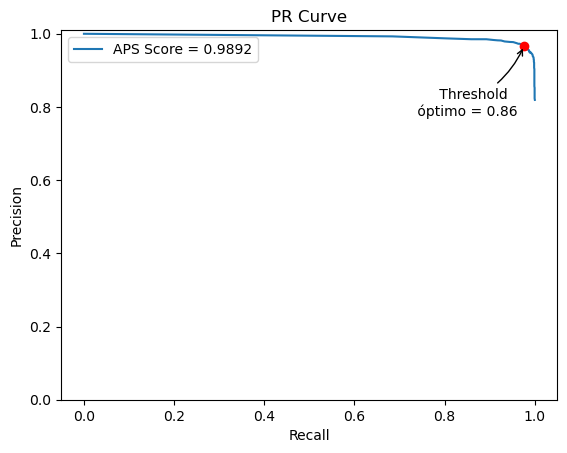

In [48]:
plt.plot(recall, precision, label = f'APS Score = {average_precision:.4}')
plt.plot(optimal_recall, optimal_precision, 'ro')
plt.annotate(f'      Threshold\n óptimo = {optimal_threshold:.2}',
             xy=(optimal_recall, optimal_precision), xycoords='data',
             xytext=(-80, -50) ,textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle = "arc3, rad = .2"))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR Curve')
plt.legend(loc = 'upper left')
plt.ylim(0, 1.01)
plt.show()

# Se calcula cuanto tiempo ha transcurrido en la ejecucion de todo el notebook y se guarda el tiempo en un fichero de texto para almacenarlo.

In [49]:
fin = time.time()
tiempo_transcurrido = fin - inicio
minutos = int((tiempo_transcurrido % 3600) // 60)
segundos = int(tiempo_transcurrido % 60)
with open(f"Tiempo de ejecucion transcurrido en el notebook {nombre_fichero}.txt", "w") as f :
    f.write(f"Tiempo transcurrido: {minutos} minutos, {segundos} segundos")

In [50]:
print(f"Tiempo transcurrido: {minutos} minutos, {segundos} segundos")

Tiempo transcurrido: 16 minutos, 48 segundos
